In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
df1 = pd.read_parquet(r'data/train/3.승인매출정보/201807_train_.parquet').iloc[:, :60]
df2 = pd.read_parquet(r'data/train/3.승인매출정보/201808_train_.parquet').iloc[:, :60]
df3 = pd.read_parquet(r'data/train/3.승인매출정보/201809_train_.parquet').iloc[:, :60]
df4 = pd.read_parquet(r'data/train/3.승인매출정보/201810_train_.parquet').iloc[:, :60]
df5 = pd.read_parquet(r'data/train/3.승인매출정보/201811_train_.parquet').iloc[:, :60]
df6 = pd.read_parquet(r'data/train/3.승인매출정보/201812_train_.parquet').iloc[:, :60]

In [3]:
print(df1.columns.tolist())

['기준년월', 'ID', '최종이용일자_기본', '최종이용일자_신판', '최종이용일자_CA', '최종이용일자_카드론', '최종이용일자_체크', '최종이용일자_일시불', '최종이용일자_할부', '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_할부_B0M', '이용건수_할부_유이자_B0M', '이용건수_할부_무이자_B0M', '이용건수_부분무이자_B0M', '이용건수_CA_B0M', '이용건수_체크_B0M', '이용건수_카드론_B0M', '이용금액_일시불_B0M', '이용금액_할부_B0M', '이용금액_할부_유이자_B0M', '이용금액_할부_무이자_B0M', '이용금액_부분무이자_B0M', '이용금액_CA_B0M', '이용금액_체크_B0M', '이용금액_카드론_B0M', '이용후경과월_신용', '이용후경과월_신판', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_할부_유이자_R12M', '이용건수_할부_무이자_R12M', '이용건수_부분무이자_R12M', '이용건수_CA_R12M', '이용건수_체크_R12M', '이용건수_카드론_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_할부_유이자_R12M', '이용금액_할부_무이자_R12M', '이용금액_부분무이자_R12M', '이용금액_CA_R12M', '이용금액_체크_R12M', '이용금액_카드론_R12M', '최대이용금액_일시불_R12M', '최대이용금액_할부_R12M', '최대이용금액_할부_유이자_R12M', '최대이용금액_할부_무이자_R12M', '최대이용금액_부분무이자_R12M']


In [4]:
target1=pd.read_parquet(r'data/train/1.회원정보/201807_train_.parquet')
target2=pd.read_parquet(r'data/train/1.회원정보/201808_train_.parquet')
target3=pd.read_parquet(r'data/train/1.회원정보/201809_train_.parquet')
target4=pd.read_parquet(r'data/train/1.회원정보/201810_train_.parquet')
target5=pd.read_parquet(r'data/train/1.회원정보/201811_train_.parquet')
target6=pd.read_parquet(r'data/train/1.회원정보/201812_train_.parquet')

In [5]:
tg_df = pd.concat([target1['Segment'], target2['Segment'], target3['Segment'], target4['Segment'], target5['Segment'], target6['Segment']])
tg_df.reset_index(inplace=True, drop=True)
tg_df

0          D
1          E
2          C
3          D
4          E
          ..
2399995    E
2399996    D
2399997    C
2399998    E
2399999    E
Name: Segment, Length: 2400000, dtype: object

In [6]:
all_df = pd.concat([df1, df2, df3, df4, df5, df6])
all_df.reset_index(inplace=True, drop=True)
all_df

,기준년월,ID,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,...,이용금액_할부_무이자_R12M,이용금액_부분무이자_R12M,이용금액_CA_R12M,이용금액_체크_R12M,이용금액_카드론_R12M,최대이용금액_일시불_R12M,최대이용금액_할부_R12M,최대이용금액_할부_유이자_R12M,최대이용금액_할부_무이자_R12M,최대이용금액_부분무이자_R12M
0,201807,TRAIN_000000,20180719,20180713,20180719,10101,20180203,20180709,20180713,11,...,5828,0,103812,6474,0,4906,0,0,0,0
1,201807,TRAIN_000001,20180719,20180719,20170728,20170327,10101,20180719,20171231,13,...,2076,0,4297,-414,46585,10407,4607,4607,2321,0
2,201807,TRAIN_000002,20180706,20180706,20180706,20151119,20141230,20180706,20180627,12,...,10561,0,374552,-414,0,10112,15453,0,15453,0
3,201807,TRAIN_000003,20180721,20180715,20180721,10101,20141111,20180704,20180715,6,...,12098,0,207745,871,0,3075,8874,3475,8874,0
4,201807,TRAIN_000004,20180124,20180124,10101,10101,20180512,20180124,10101,-2,...,0,0,0,10754,0,62,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,20181220,20181220,10101,10101,20181212,20181220,20160501,2,...,0,0,0,22013,0,0,0,0,0,0
2399996,201812,TRAIN_399996,20181202,20181202,10101,20170112,10101,20181202,20180112,10,...,1888,0,0,6946,0,47684,2848,0,2848,0
2399997,201812,TRAIN_399997,20181230,20181230,10101,10101,20131124,20181230,20180919,10,...,27617,0,0,746,0,10212,15845,0,15845,0
2399998,201812,TRAIN_399998,20161224,20161224,10101,10101,10101,20161224,20150122,-2,...,0,0,0,765,0,0,0,0,0,0


In [7]:
all_df['Segment'] = tg_df

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

def eta_squared(anova_ss_between, total_ss):
    return anova_ss_between / total_ss if total_ss != 0 else np.nan

# 수치형/범주형 자동 구분
num_cols = all_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = all_df.select_dtypes(exclude=[np.number]).columns.tolist()

anova = []
chi = []

for col in all_df.columns:
    if col == 'Segment':
        continue

    if col in num_cols:
        data = all_df[[col, 'Segment']].dropna()
        groups = [data[data['Segment'] == val][col] for val in data['Segment'].unique()]
        try:
            stat = f_oneway(*groups).statistic
            ss_between = sum([(g.mean() - data[col].mean())**2 * len(g) for g in groups])
            ss_total = sum((data[col] - data[col].mean())**2)
            eta2 = eta_squared(ss_between, ss_total)
            anova.append({'변수': col, '유형': '수치형', '계수종류': 'Eta²', '상관계수': eta2})
        except:
            continue

    elif col in cat_cols:
        contingency = pd.crosstab(all_df[col], all_df['Segment'])
        if contingency.shape[0] > 1 and contingency.shape[1] > 1:
            try:
                v = cramers_v(contingency)
                chi.append({'변수': col, '유형': '범주형', '계수종류': "Cramér's V", '상관계수': v})
            except:
                continue

# 결과 정리
result_df1 = pd.DataFrame(anova)
result_df2 = pd.DataFrame(chi)
result_df1 = result_df1.sort_values(by='상관계수', ascending=False).reset_index(drop=True)
result_df2 = result_df2.sort_values(by='상관계수', ascending=False).reset_index(drop=True)

# 결과 출력
display(result_df1)
display(result_df2)

,변수,유형,계수종류,상관계수
0,이용금액_일시불_R12M,수치형,Eta²,0.355606
1,이용금액_일시불_B0M,수치형,Eta²,0.331317
2,이용건수_신용_R12M,수치형,Eta²,0.240197
3,최대이용금액_일시불_R12M,수치형,Eta²,0.237028
4,이용건수_신판_R12M,수치형,Eta²,0.236496
5,이용건수_일시불_R12M,수치형,Eta²,0.232093
6,이용건수_신용_B0M,수치형,Eta²,0.196650
7,이용건수_신판_B0M,수치형,Eta²,0.193074
8,이용건수_일시불_B0M,수치형,Eta²,0.190380
9,이용금액_할부_R12M,수치형,Eta²,0.127154


,변수,유형,계수종류,상관계수
0,ID,범주형,Cramér's V,1.0


In [9]:
df11 = pd.read_parquet(r'data/train/3.승인매출정보/201807_train_.parquet').iloc[:, 61:129]
df12 = pd.read_parquet(r'data/train/3.승인매출정보/201808_train_.parquet').iloc[:, 61:129]
df13 = pd.read_parquet(r'data/train/3.승인매출정보/201809_train_.parquet').iloc[:, 61:129]
df14 = pd.read_parquet(r'data/train/3.승인매출정보/201810_train_.parquet').iloc[:, 61:129]
df15 = pd.read_parquet(r'data/train/3.승인매출정보/201811_train_.parquet').iloc[:, 61:129]
df16 = pd.read_parquet(r'data/train/3.승인매출정보/201812_train_.parquet').iloc[:, 61:129]

In [10]:
print(df11.columns.tolist())

['최대이용금액_체크_R12M', '최대이용금액_카드론_R12M', '이용개월수_신용_R12M', '이용개월수_신판_R12M', '이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_할부_유이자_R12M', '이용개월수_할부_무이자_R12M', '이용개월수_부분무이자_R12M', '이용개월수_CA_R12M', '이용개월수_체크_R12M', '이용개월수_카드론_R12M', '이용건수_신용_R6M', '이용건수_신판_R6M', '이용건수_일시불_R6M', '이용건수_할부_R6M', '이용건수_할부_유이자_R6M', '이용건수_할부_무이자_R6M', '이용건수_부분무이자_R6M', '이용건수_CA_R6M', '이용건수_체크_R6M', '이용건수_카드론_R6M', '이용금액_일시불_R6M', '이용금액_할부_R6M', '이용금액_할부_유이자_R6M', '이용금액_할부_무이자_R6M', '이용금액_부분무이자_R6M', '이용금액_CA_R6M', '이용금액_체크_R6M', '이용금액_카드론_R6M', '이용개월수_신용_R6M', '이용개월수_신판_R6M', '이용개월수_일시불_R6M', '이용개월수_할부_R6M', '이용개월수_할부_유이자_R6M', '이용개월수_할부_무이자_R6M', '이용개월수_부분무이자_R6M', '이용개월수_CA_R6M', '이용개월수_체크_R6M', '이용개월수_카드론_R6M', '이용건수_신용_R3M', '이용건수_신판_R3M', '이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_할부_유이자_R3M', '이용건수_할부_무이자_R3M', '이용건수_부분무이자_R3M', '이용건수_CA_R3M', '이용건수_체크_R3M', '이용건수_카드론_R3M', '이용금액_일시불_R3M', '이용금액_할부_R3M', '이용금액_할부_유이자_R3M', '이용금액_할부_무이자_R3M', '이용금액_부분무이자_R3M', '이용금액_CA_R3M', '이용금액_체크_R3M', '이용금액_카드론_R3M', '이용개월수_신용_R3M'

In [11]:
all_df2 = pd.concat([df11, df12, df13, df14, df15, df16])
all_df2.reset_index(inplace=True, drop=True)
all_df2

,최대이용금액_체크_R12M,최대이용금액_카드론_R12M,이용개월수_신용_R12M,이용개월수_신판_R12M,이용개월수_일시불_R12M,이용개월수_할부_R12M,이용개월수_할부_유이자_R12M,이용개월수_할부_무이자_R12M,이용개월수_부분무이자_R12M,이용개월수_CA_R12M,...,이용개월수_신용_R3M,이용개월수_신판_R3M,이용개월수_일시불_R3M,이용개월수_할부_R3M,이용개월수_할부_유이자_R3M,이용개월수_할부_무이자_R3M,이용개월수_부분무이자_R3M,이용개월수_CA_R3M,이용개월수_체크_R3M,이용개월수_카드론_R3M
0,1020,0,12,12,12,5,1,4,0,12,...,3,3,3,1,0,1,0,3,0,0
1,0,41320,12,12,12,2,1,1,0,2,...,3,3,3,0,0,0,0,0,0,0
2,0,0,9,9,9,2,0,2,0,8,...,3,3,3,1,0,1,0,2,0,0
3,0,0,12,12,7,8,4,5,0,12,...,3,3,3,2,1,1,0,3,0,0
4,3324,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,5072,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2399996,0,0,12,12,12,1,0,1,0,0,...,3,3,3,0,0,0,0,0,0,0
2399997,0,0,12,12,12,4,0,4,0,0,...,3,3,3,1,0,1,0,0,0,0
2399998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
all_df2['Segment'] = tg_df

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

def eta_squared(anova_ss_between, total_ss):
    return anova_ss_between / total_ss if total_ss != 0 else np.nan

# 수치형/범주형 자동 구분
num_cols = all_df2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = all_df2.select_dtypes(exclude=[np.number]).columns.tolist()

anova = []
chi = []

for col in all_df2.columns:
    if col == 'Segment':
        continue

    if col in num_cols:
        data = all_df2[[col, 'Segment']].dropna()
        groups = [data[data['Segment'] == val][col] for val in data['Segment'].unique()]
        try:
            stat = f_oneway(*groups).statistic
            ss_between = sum([(g.mean() - data[col].mean())**2 * len(g) for g in groups])
            ss_total = sum((data[col] - data[col].mean())**2)
            eta2 = eta_squared(ss_between, ss_total)
            anova.append({'변수': col, '유형': '수치형', '계수종류': 'Eta²', '상관계수': eta2})
        except:
            continue

    elif col in cat_cols:
        contingency = pd.crosstab(all_df2[col], all_df2['Segment'])
        if contingency.shape[0] > 1 and contingency.shape[1] > 1:
            try:
                v = cramers_v(contingency)
                chi.append({'변수': col, '유형': '범주형', '계수종류': "Cramér's V", '상관계수': v})
            except:
                continue

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.5f}'.format)

# 결과 정리
result_df3 = pd.DataFrame(anova)
result_df3 = result_df3.sort_values(by='상관계수', ascending=False).reset_index(drop=True)

# 결과 출력
display(result_df3)

,변수,유형,계수종류,상관계수
0,이용금액_일시불_R6M,수치형,Eta²,0.32496
1,이용금액_일시불_R3M,수치형,Eta²,0.32291
2,이용건수_신용_R6M,수치형,Eta²,0.19695
3,이용건수_신용_R3M,수치형,Eta²,0.19397
4,이용건수_신판_R6M,수치형,Eta²,0.19368
5,이용건수_신판_R3M,수치형,Eta²,0.19064
6,이용건수_일시불_R6M,수치형,Eta²,0.19043
7,이용건수_일시불_R3M,수치형,Eta²,0.18795
8,이용개월수_할부_R12M,수치형,Eta²,0.09121
9,이용개월수_할부_무이자_R12M,수치형,Eta²,0.09119


In [15]:
with pd.ExcelWriter('3-1.승인매출정보.xlsx', engine='openpyxl') as writer:
    result_df1.to_excel(writer, sheet_name='Result1', index=False)
    result_df2.to_excel(writer, sheet_name='Result2', index=False)
    result_df3.to_excel(writer, sheet_name='Result3', index=False)

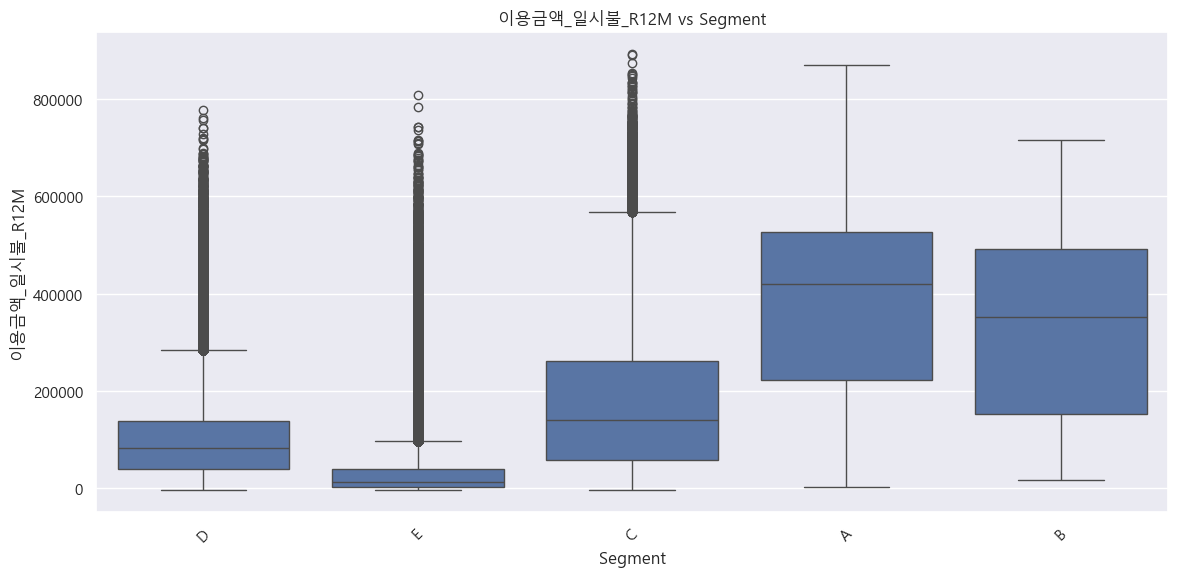

In [16]:
col = '이용금액_일시불_R12M'

if pd.api.types.is_numeric_dtype(all_df[col]):
    sns.boxplot(data=all_df, x='Segment', y=col)
else:
    sns.countplot(data=all_df, x=col, hue='Segment', order=all_df[col].value_counts().index)

plt.title(f"{col} vs Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
col = '이용금액_일시불_B0M'

if pd.api.types.is_numeric_dtype(all_df[col]):
    sns.boxplot(data=all_df, x='Segment', y=col, order=['A', 'B', 'C', 'D', 'E'])
else:
    sns.countplot(data=all_df, x=col, hue='Segment', order=all_df[col].value_counts().index)

plt.title(f"{col} vs Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

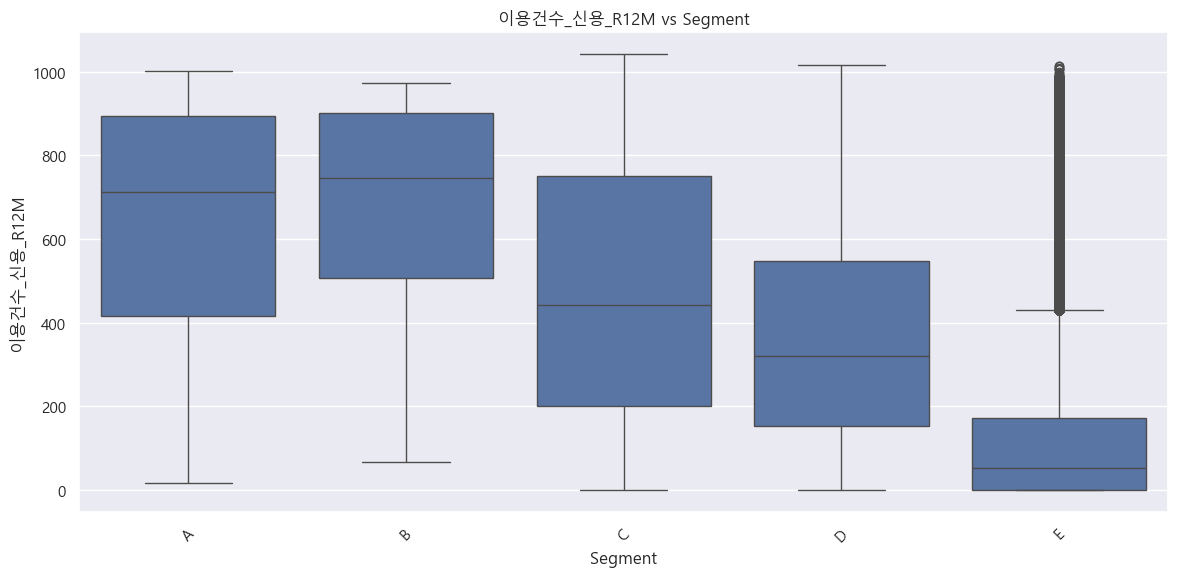

In [20]:
col = '이용건수_신용_R12M'

if pd.api.types.is_numeric_dtype(all_df[col]):
    sns.boxplot(data=all_df, x='Segment', y=col, order=['A', 'B', 'C', 'D', 'E'])
else:
    sns.countplot(data=all_df, x=col, hue='Segment', order=all_df[col].value_counts().index)

plt.title(f"{col} vs Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

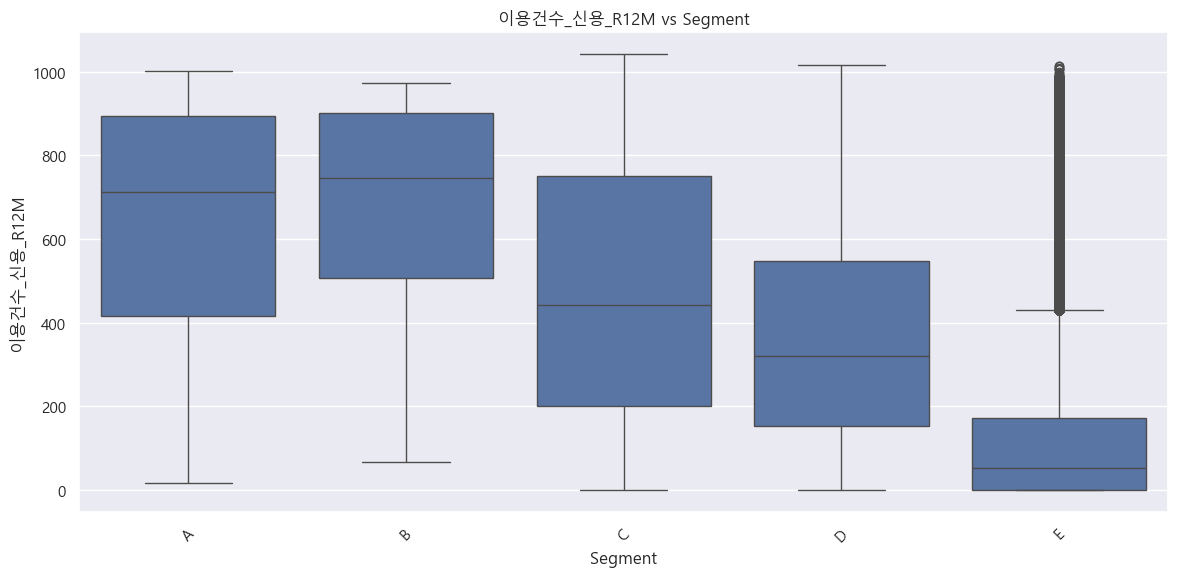

In [19]:
col = '이용건수_신용_R12M'

if pd.api.types.is_numeric_dtype(all_df[col]):
    sns.boxplot(data=all_df, x='Segment', y=col, order=['A', 'B', 'C', 'D', 'E'])
else:
    sns.countplot(data=all_df, x=col, hue='Segment', order=all_df[col].value_counts().index)

plt.title(f"{col} vs Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()